In [2]:
import pandas as pd

#df = pd.read_csv("clearscore.csv")
"""df2 = pd.read_csv("card_clicks_sample.csv")
df3 = pd.read_csv("credit_report_sample.csv")"""
df = pd.read_csv('clearscore.csv', index_col=0)

In [3]:
df.head()

,masked_id,local_datetime,local_date,credit_score,employment_status,residential_status,salary,ever_default,ever_delinquent,birth_date,months_since_default,open_credit_cards,open_loans,click_date,apr_clicked,eligibility_clicked,login_date,device
0,5701,2021-10-16 23:48:57.000000,2021-10-16,461,FT_EMPLOYED,COUNCIL_TENANT,31515.0,False,False,36,-1,3,0,NaN,NaN,NaN,NaN,NaN
1,5702,2021-10-13 23:51:04.000000,2021-10-13,451,FT_EMPLOYED,WITH_PARENTS,21500.0,True,True,33,47,1,0,NaN,NaN,NaN,2021-09-25,ios
2,5703,2021-10-18 00:15:05.000000,2021-10-18,367,FT_EMPLOYED,PRIVATE_TENANT,46000.0,False,False,31,-1,0,0,NaN,NaN,NaN,NaN,NaN
3,5704,2021-10-19 00:54:31.000000,2021-10-19,541,PT_EMPLOYED,HOMEOWNER,31000.0,False,False,38,-1,0,0,NaN,NaN,NaN,NaN,NaN
4,5705,2021-10-16 04:01:57.000000,2021-10-16,351,FT_EMPLOYED,HOMEOWNER,27000.0,False,False,30,-1,0,0,NaN,NaN,NaN,2021-09-29,android


In [4]:
len(df)

1947017

In [5]:
df.shape

(1947017, 18)

In [6]:
df.isnull().sum()

masked_id                     0
local_datetime                0
local_date                    0
credit_score                  0
employment_status           102
residential_status            0
salary                    18486
ever_default                  0
ever_delinquent               0
birth_date                    0
months_since_default          0
open_credit_cards             0
open_loans                    0
click_date              1613348
apr_clicked             1631339
eligibility_clicked     1697722
login_date               698850
device                   698850
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947017 entries, 0 to 1947016
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   masked_id             int64  
 1   local_datetime        object 
 2   local_date            object 
 3   credit_score          int64  
 4   employment_status     object 
 5   residential_status    object 
 6   salary                float64
 7   ever_default          bool   
 8   ever_delinquent       bool   
 9   birth_date            int64  
 10  months_since_default  int64  
 11  open_credit_cards     int64  
 12  open_loans            int64  
 13  click_date            object 
 14  apr_clicked           float64
 15  eligibility_clicked   float64
 16  login_date            object 
 17  device                object 
dtypes: bool(2), float64(3), int64(6), object(7)
memory usage: 256.2+ MB


In [35]:
df.describe()
df1 = df

In [36]:
df1 = df.drop(['click_date','apr_clicked','eligibility_clicked','local_datetime','local_date','login_date','device','employment_status','residential_status'], axis=1) #droping most missing value columns as not usable


In [37]:
df1 = df1.fillna(df1.mean())

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947017 entries, 0 to 1947016
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   masked_id             int64  
 1   credit_score          int64  
 2   salary                float64
 3   ever_default          bool   
 4   ever_delinquent       bool   
 5   birth_date            int64  
 6   months_since_default  int64  
 7   open_credit_cards     int64  
 8   open_loans            int64  
dtypes: bool(2), float64(1), int64(6)
memory usage: 122.6 MB


In [39]:
df1["ever_default"] = df["ever_default"].astype(float)

In [40]:
df1["ever_delinquent"] = df["ever_delinquent"].astype(float)

In [41]:
import seaborn as sns
%matplotlib inline

KeyboardInterrupt: 

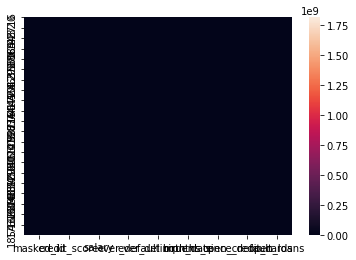

In [42]:
#sns.heatmap(df1) #infinite loop or pc too shit to handel the load

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

In [44]:
df1.head()

,masked_id,credit_score,salary,ever_default,ever_delinquent,birth_date,months_since_default,open_credit_cards,open_loans
0,0.005700,0.607378,0.000017,0.0,0.0,0.156522,0.000000,0.054545,0.0
1,0.005701,0.594203,0.000012,1.0,1.0,0.130435,0.444444,0.018182,0.0
2,0.005702,0.483531,0.000025,0.0,0.0,0.113043,0.000000,0.000000,0.0
3,0.005703,0.712780,0.000017,0.0,0.0,0.173913,0.000000,0.000000,0.0
4,0.005704,0.462451,0.000015,0.0,0.0,0.104348,0.000000,0.000000,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1947017 entries, 0 to 1947016
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   masked_id             int64  
 1   local_datetime        object 
 2   local_date            object 
 3   credit_score          int64  
 4   employment_status     object 
 5   residential_status    object 
 6   salary                float64
 7   ever_default          bool   
 8   ever_delinquent       bool   
 9   birth_date            int64  
 10  months_since_default  int64  
 11  open_credit_cards     int64  
 12  open_loans            int64  
 13  click_date            object 
 14  apr_clicked           float64
 15  eligibility_clicked   float64
 16  login_date            object 
 17  device                object 
dtypes: bool(2), float64(3), int64(6), object(7)
memory usage: 256.2+ MB


<AxesSubplot:>

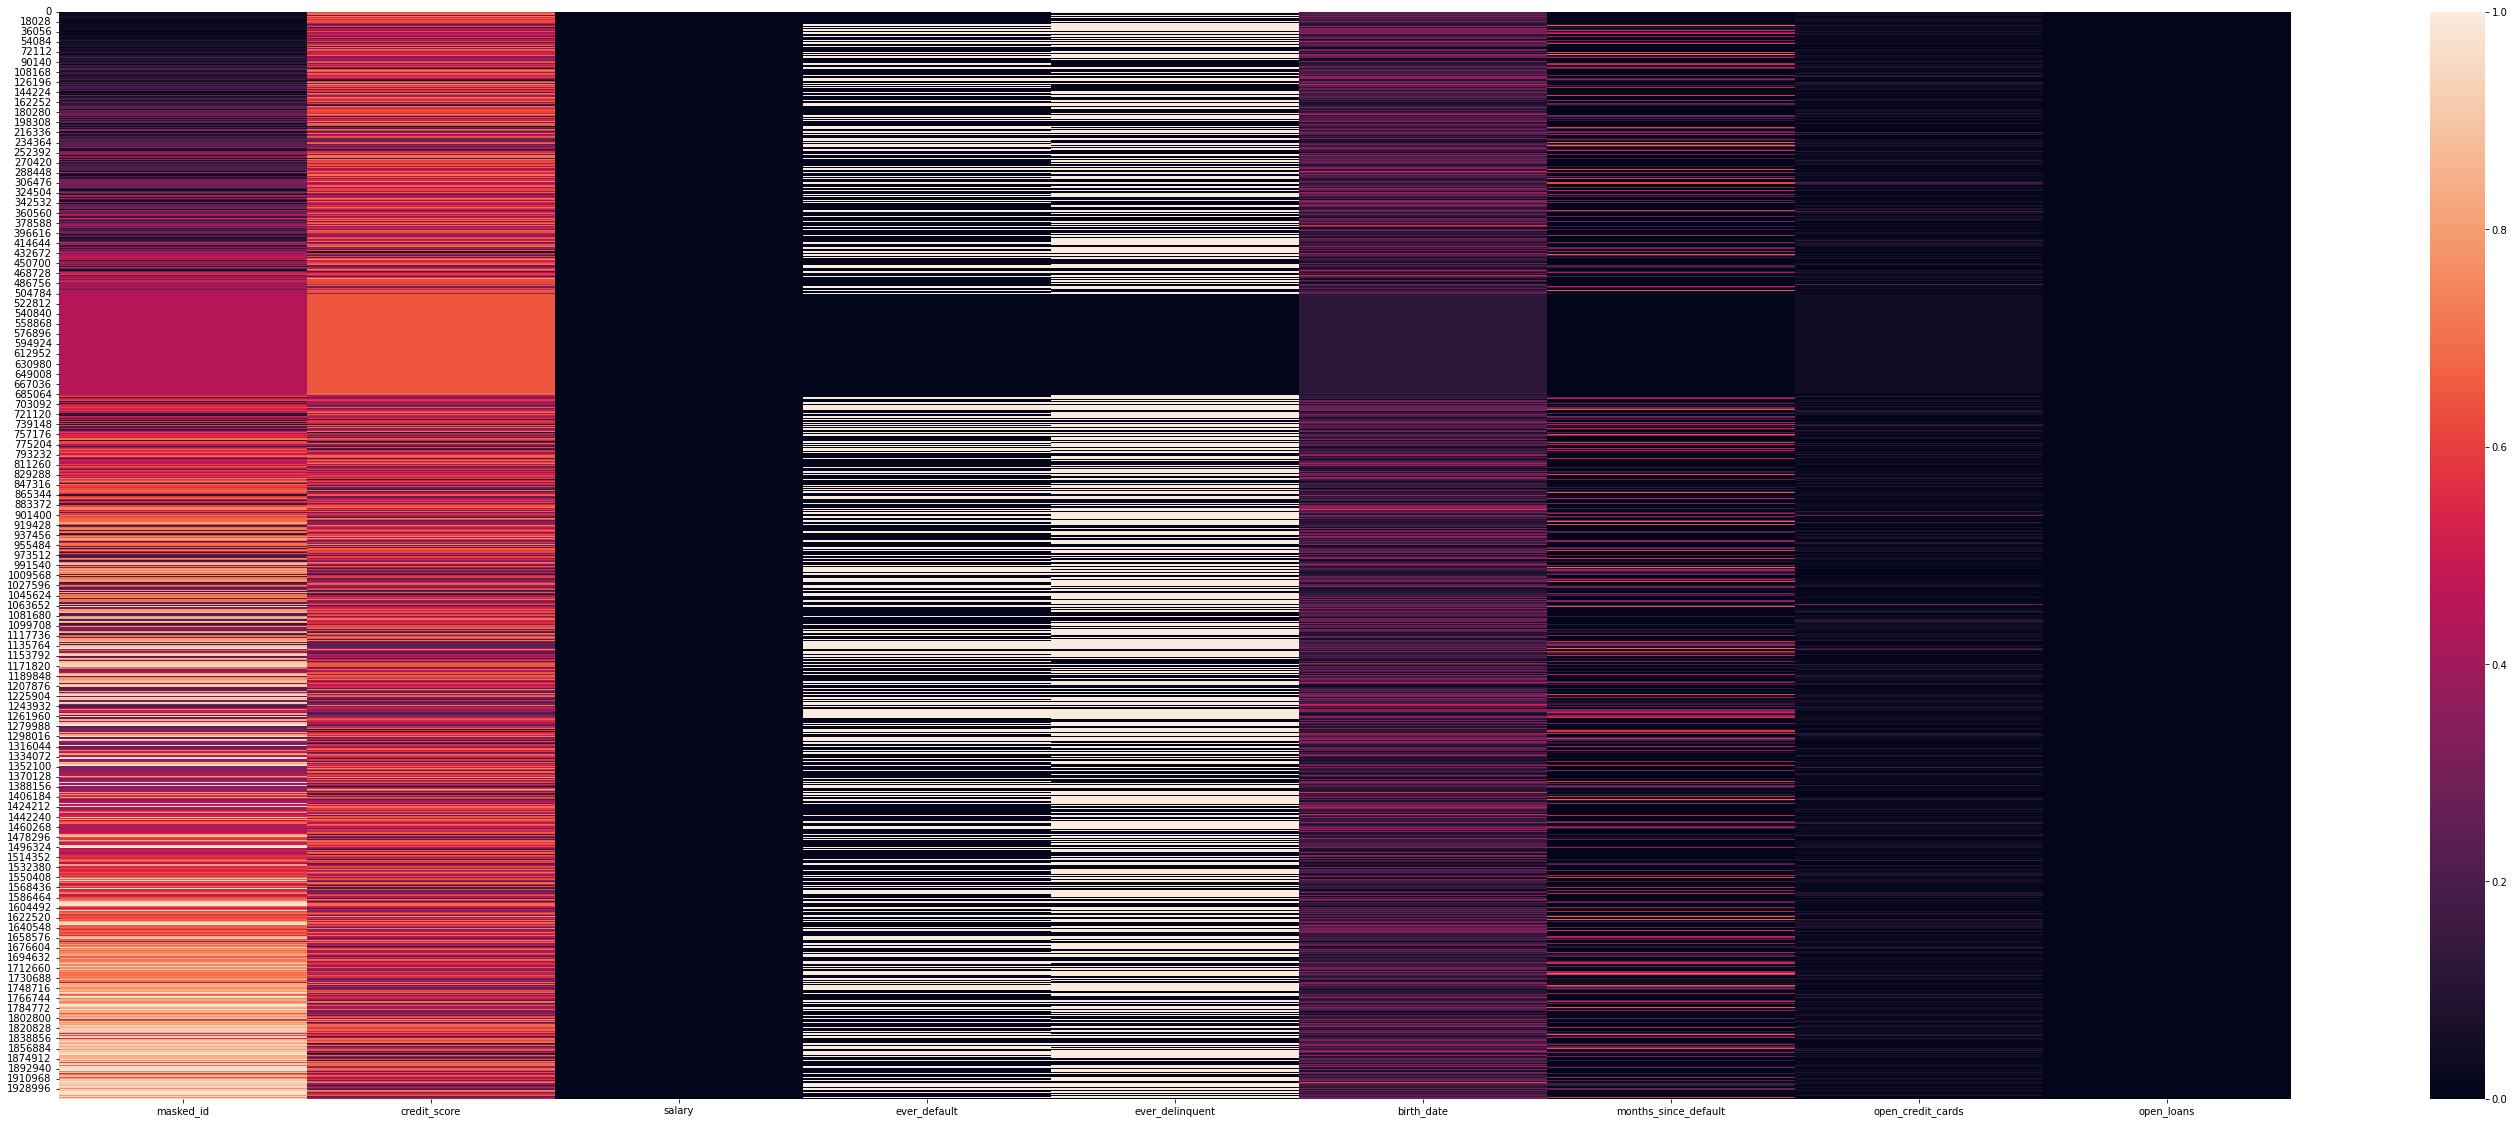

In [74]:
plt.figure(figsize=(50,20)) 
sns.heatmap(df1)

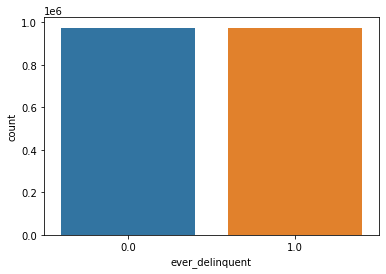

In [52]:
ax = sns.countplot(x='ever_delinquent', data=df1)

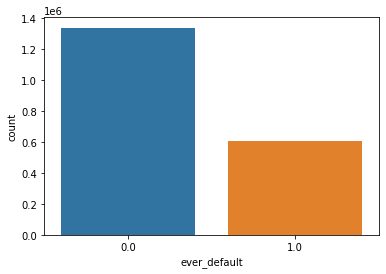

In [54]:
ax = sns.countplot(x='ever_default', data=df1)

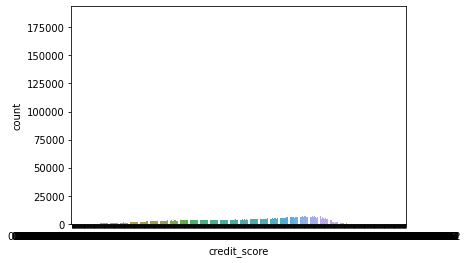

In [55]:
ax = sns.countplot(x='credit_score', data=df1) # need to plot with master_id

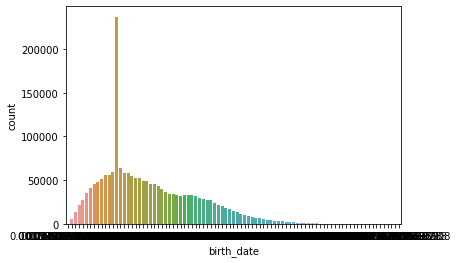

In [56]:
ax = sns.countplot(x='birth_date', data=df1)

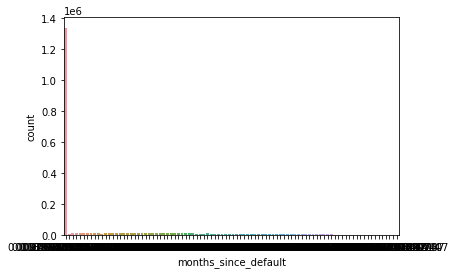

In [57]:
ax = sns.countplot(x='months_since_default', data=df1)

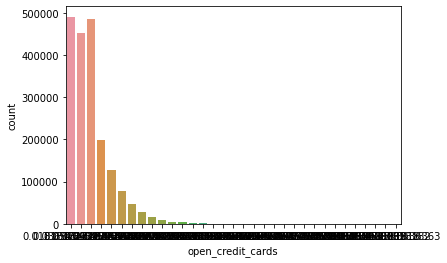

In [59]:
ax = sns.countplot(x='open_credit_cards', data=df1)

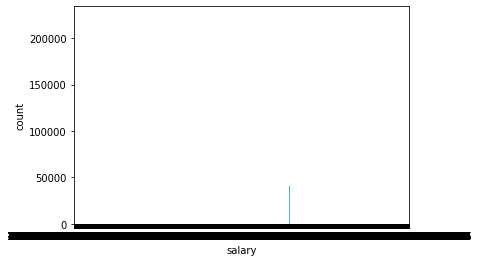

In [62]:
ax = sns.countplot(x='salary', data=df1)

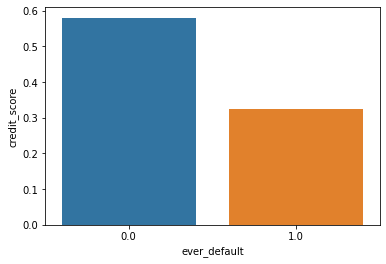

In [75]:
#all plots wrt ever_default
ax = sns.barplot(x="ever_default", y="credit_score", data=df1)

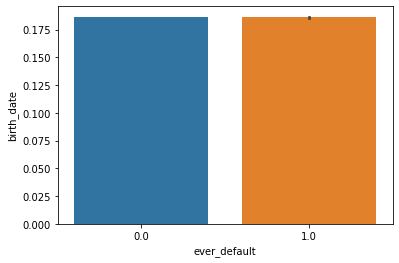

In [76]:
ax = sns.barplot(x="ever_default", y="birth_date", data=df1)

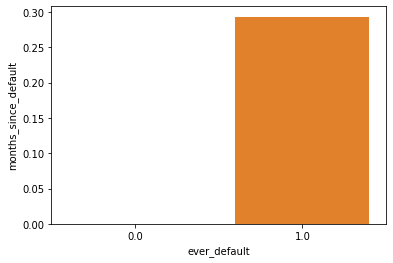

In [77]:
ax = sns.barplot(x="ever_default", y="months_since_default", data=df1)

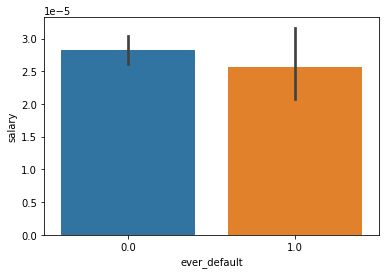

In [78]:
ax = sns.barplot(x="ever_default", y="salary", data=df1)

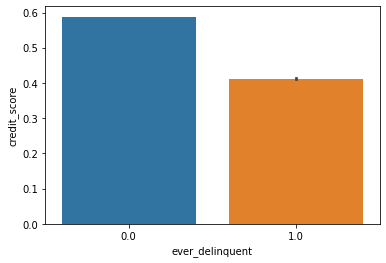

In [79]:
#all plots wrt ever_delinquent
ax = sns.barplot(x="ever_delinquent", y="credit_score", data=df1)

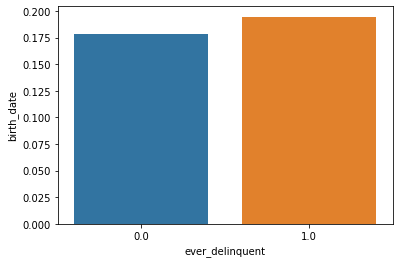

In [80]:
ax = sns.barplot(x="ever_delinquent", y="birth_date", data=df1)

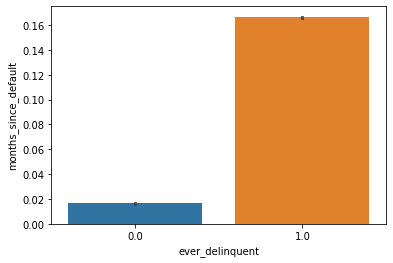

In [81]:
ax = sns.barplot(x="ever_delinquent", y="months_since_default", data=df1)

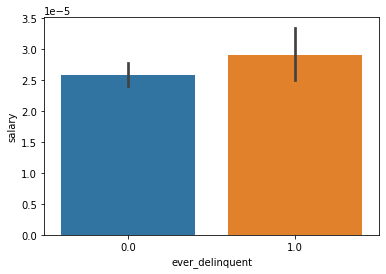

In [82]:
ax = sns.barplot(x="ever_delinquent", y="salary", data=df1)

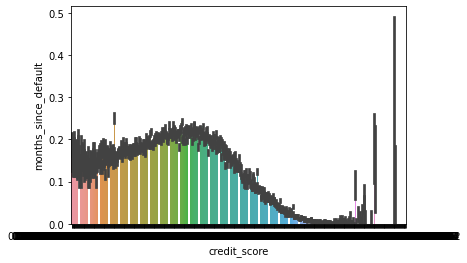

In [83]:
#wrt credit score
ax = sns.barplot(x="credit_score", y="months_since_default", data=df1)

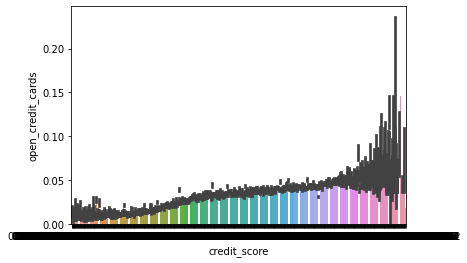

In [84]:
ax = sns.barplot(x="credit_score", y="open_credit_cards", data=df1)

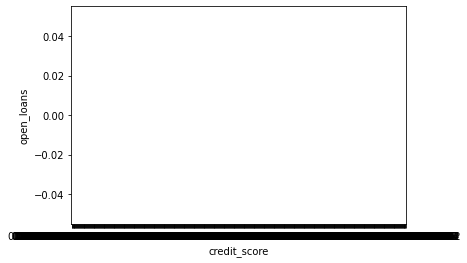

In [85]:
ax = sns.barplot(x="credit_score", y="open_loans", data=df1)

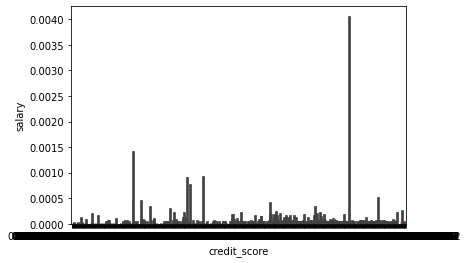

In [86]:
ax = sns.barplot(x="credit_score", y="salary", data=df1)

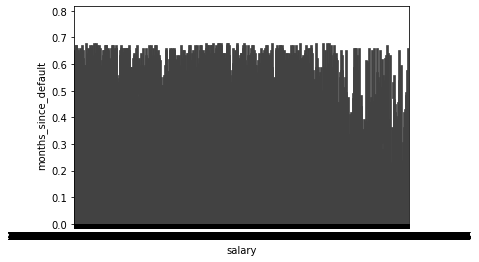

In [87]:
#wrt salary
ax = sns.barplot(x="salary", y="months_since_default", data=df1)

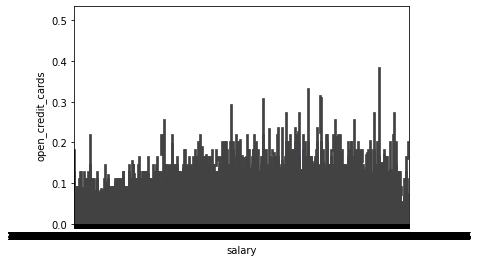

In [88]:
ax = sns.barplot(x="salary", y="open_credit_cards", data=df1)

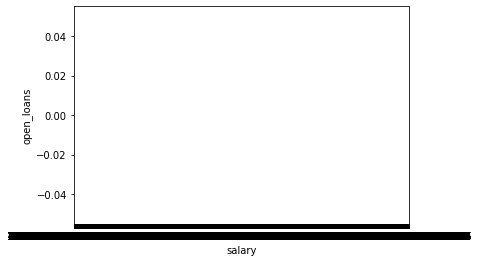

In [89]:
ax = sns.barplot(x="salary", y="open_loans", data=df1)

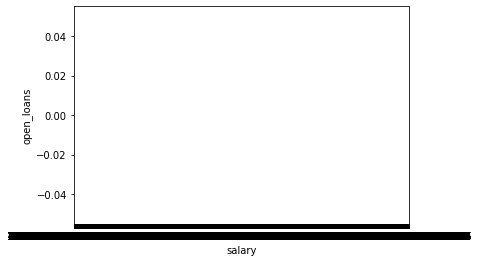

In [90]:
ax = sns.barplot(x="salary", y="open_loans", data=df1)

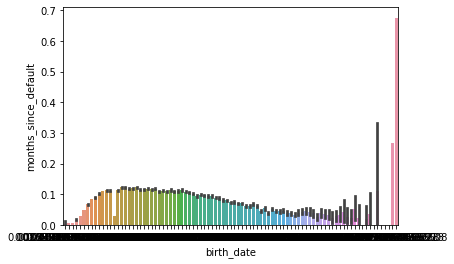

In [91]:
#wrt birth_date
ax = sns.barplot(x="birth_date", y="months_since_default", data=df1)

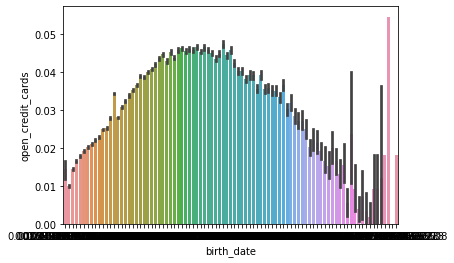

In [92]:
ax = sns.barplot(x="birth_date", y="open_credit_cards", data=df1)

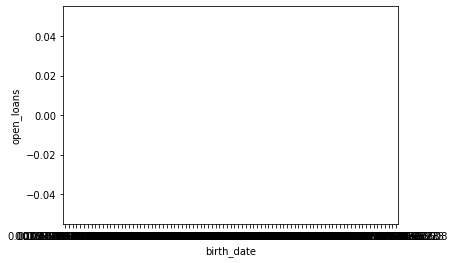

In [93]:
ax = sns.barplot(x="birth_date", y="open_loans", data=df1)

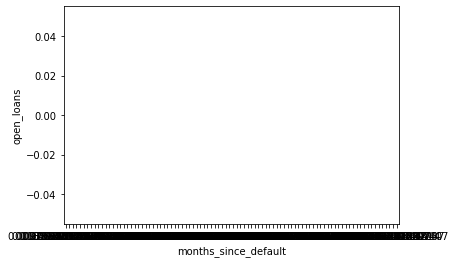

In [94]:
#wrt
ax = sns.barplot(x="months_since_default", y="open_loans", data=df1)

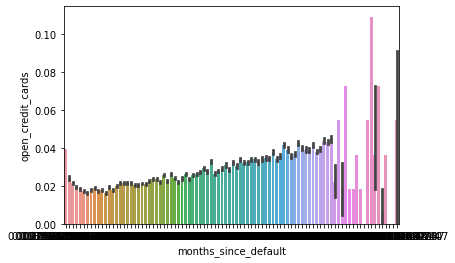

In [95]:
ax = sns.barplot(x="months_since_default", y="open_credit_cards", data=df1)

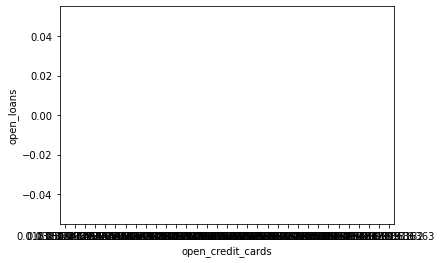

In [96]:
# open_credit_cards
ax = sns.barplot(x="open_credit_cards", y="open_loans", data=df1)

In [35]:
master.head()

,masked_id,local_datetime,local_date,credit_score,employment_status,residential_status,salary,ever_default,ever_delinquent,birth_date,months_since_default,open_credit_cards,open_loans,click_date,apr_clicked,eligibility_clicked,login_date,device
0,5701,2021-10-16 23:48:57.000000,2021-10-16,461,FT_EMPLOYED,COUNCIL_TENANT,31515.0,False,False,36,-1,3,0,NaN,NaN,NaN,NaN,NaN
1,5702,2021-10-13 23:51:04.000000,2021-10-13,451,FT_EMPLOYED,WITH_PARENTS,21500.0,True,True,33,47,1,0,NaN,NaN,NaN,2021-09-25,ios
2,5703,2021-10-18 00:15:05.000000,2021-10-18,367,FT_EMPLOYED,PRIVATE_TENANT,46000.0,False,False,31,-1,0,0,NaN,NaN,NaN,NaN,NaN
3,5704,2021-10-19 00:54:31.000000,2021-10-19,541,PT_EMPLOYED,HOMEOWNER,31000.0,False,False,38,-1,0,0,NaN,NaN,NaN,NaN,NaN
4,5705,2021-10-16 04:01:57.000000,2021-10-16,351,FT_EMPLOYED,HOMEOWNER,27000.0,False,False,30,-1,0,0,NaN,NaN,NaN,2021-09-29,android


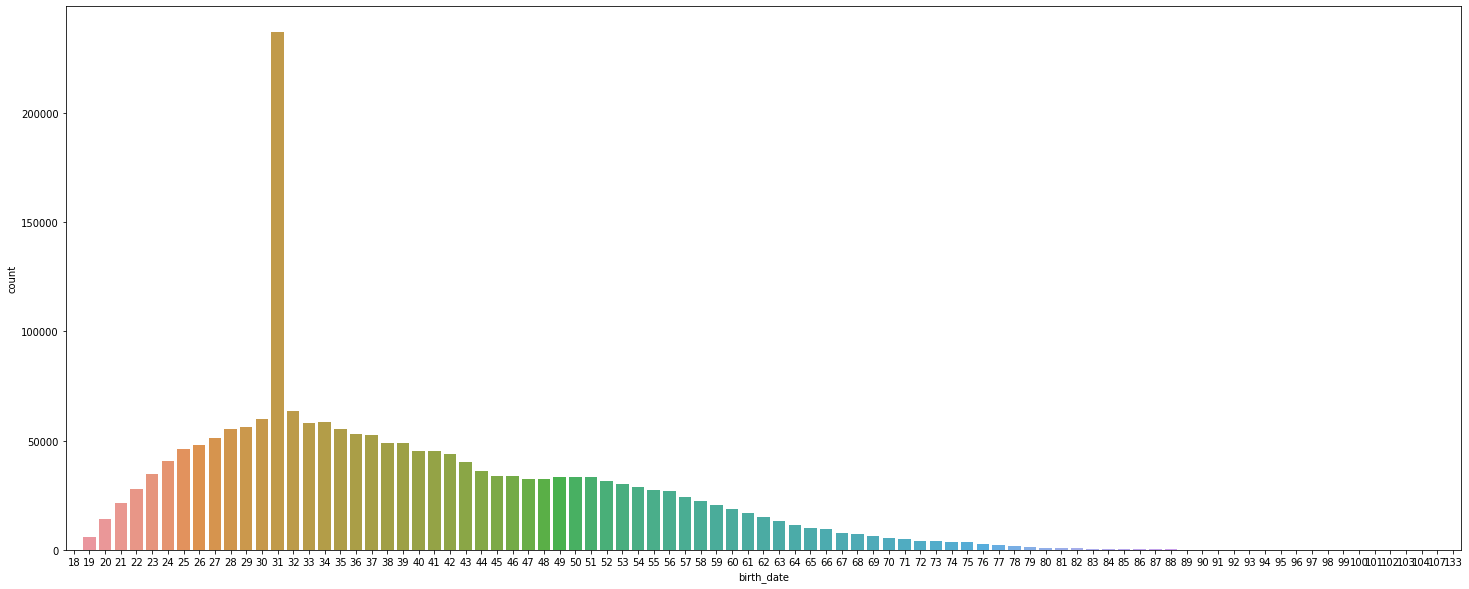

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))

ax1 = sns.countplot(x=df.birth_date)

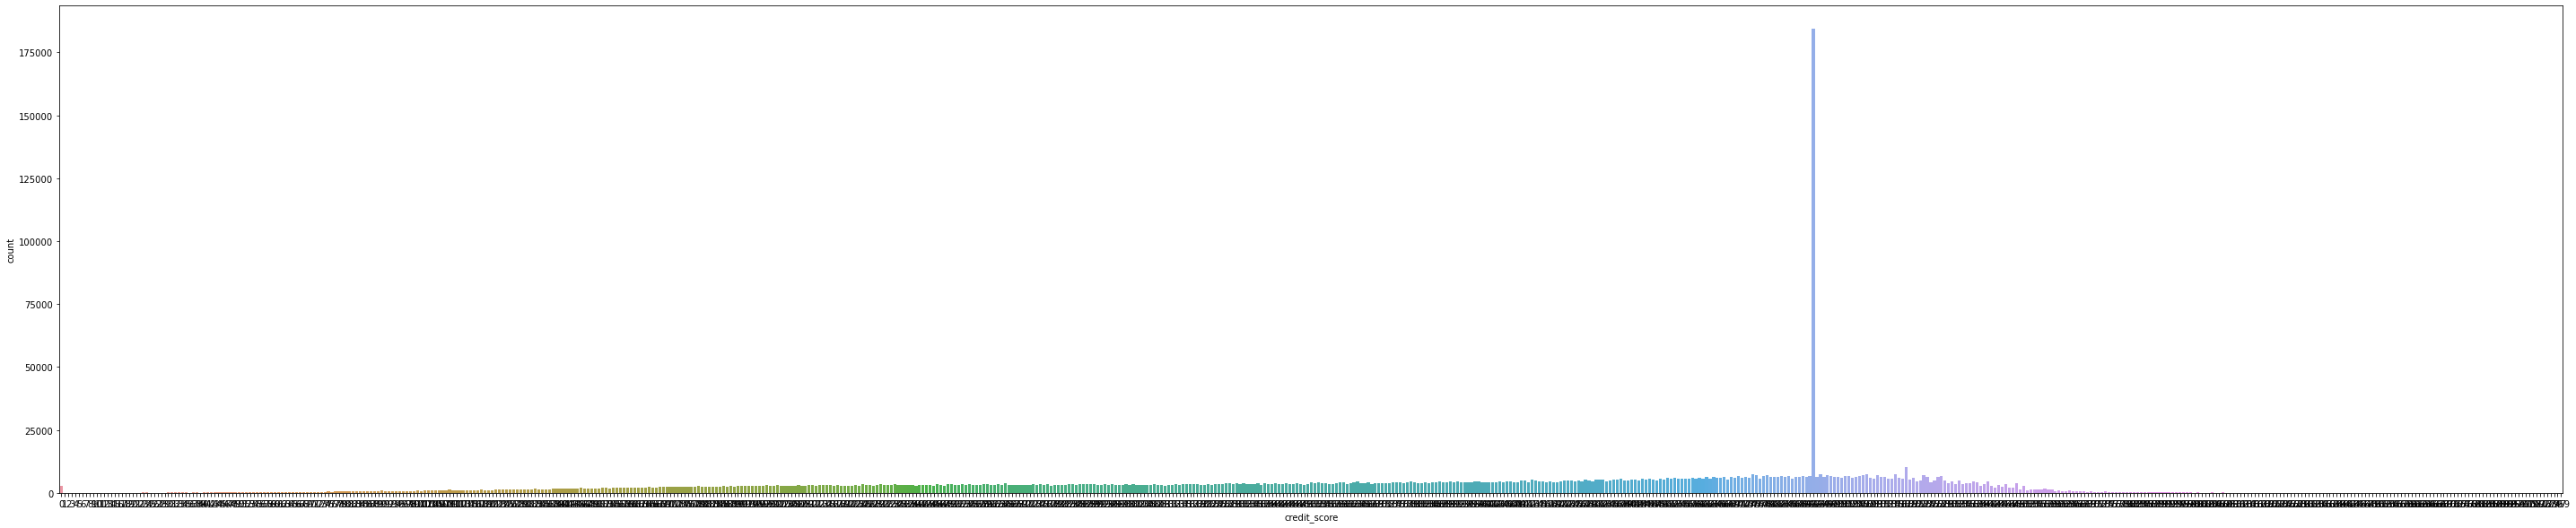

In [74]:
plt.figure(figsize=(50,10))
ax2 = sns.countplot(x=master.credit_score)

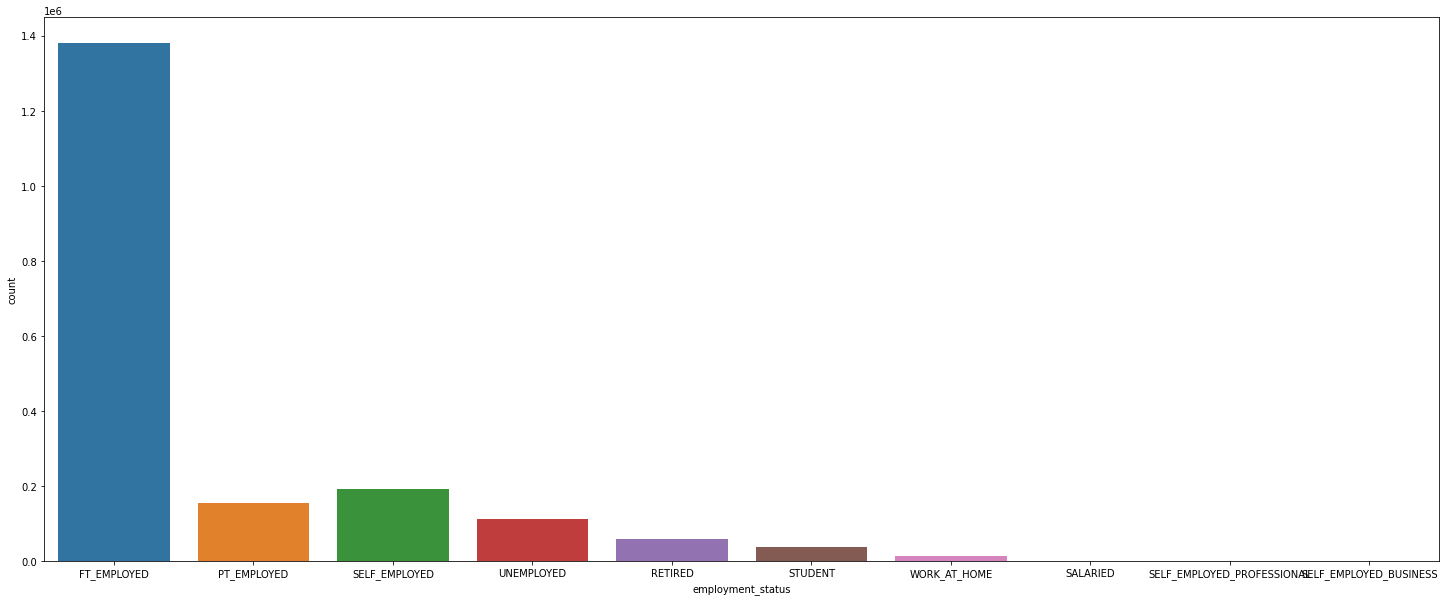

In [73]:
"""plt.figure(figsize=(25,10))
ax3 = sns.countplot(x='')"""
plt.figure(figsize=(25,10))
ax = sns.countplot(x="employment_status", data=df)

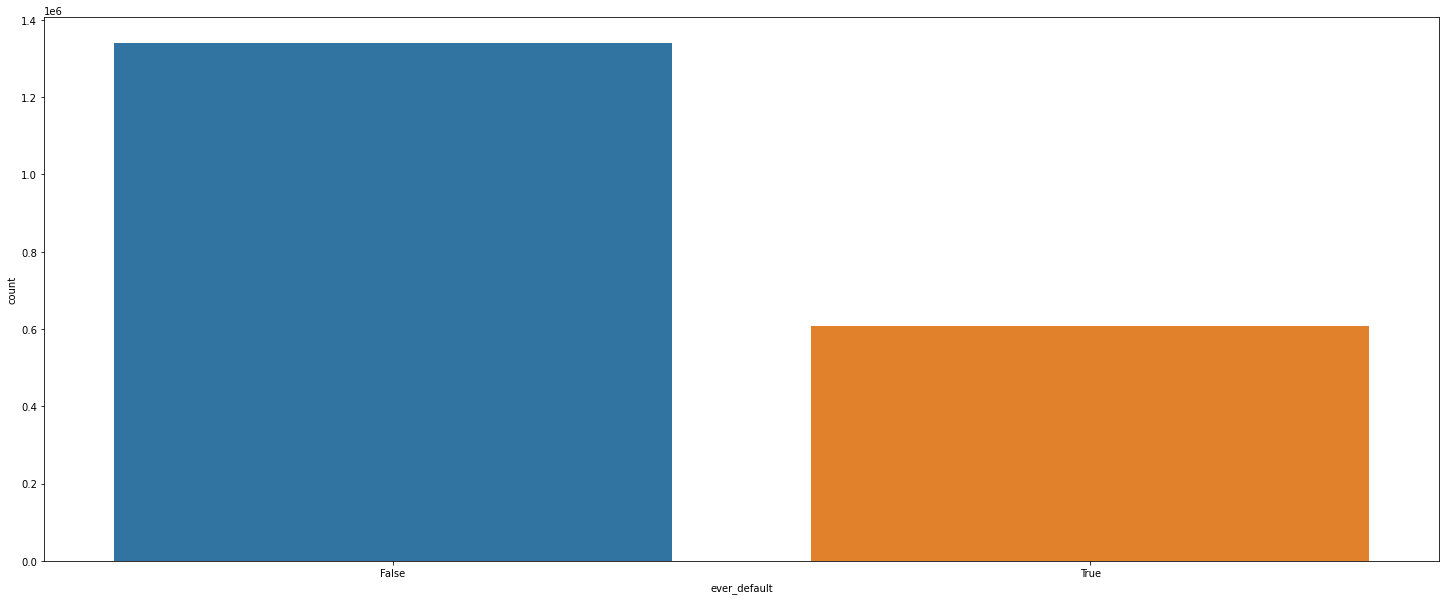

In [80]:
plt.figure(figsize=(25,10))
ax4 = sns.countplot(x=master.ever_default)

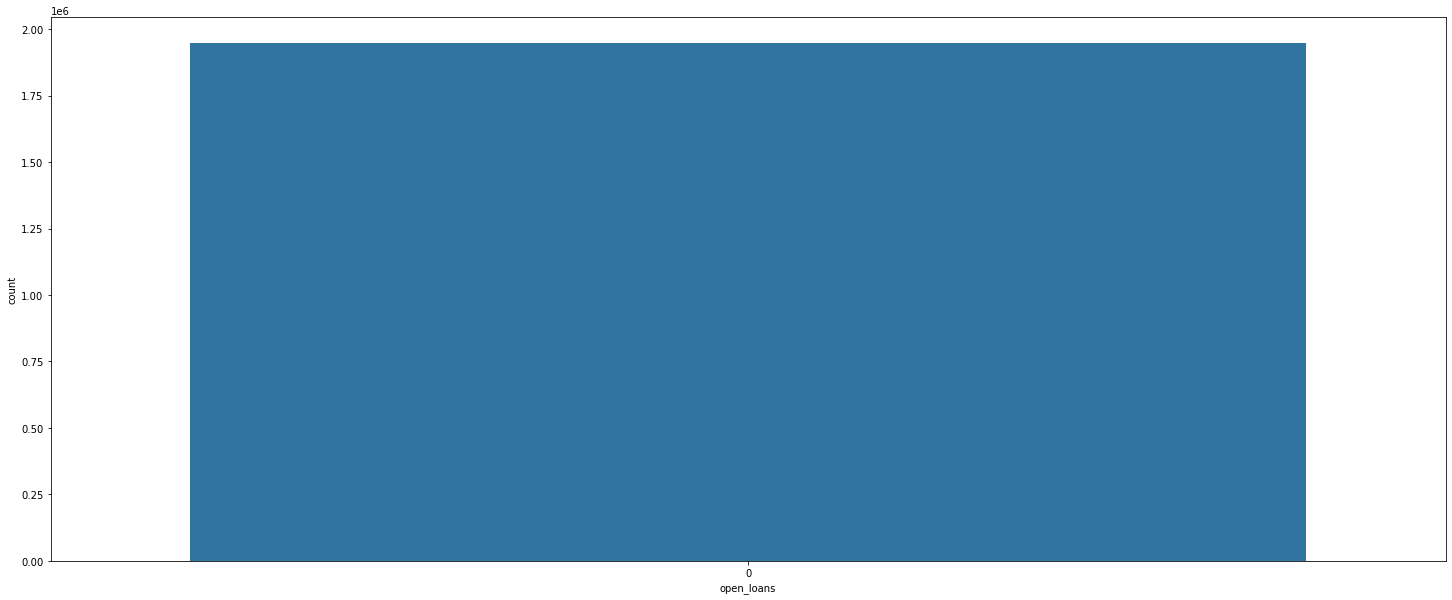

In [81]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.open_loans)

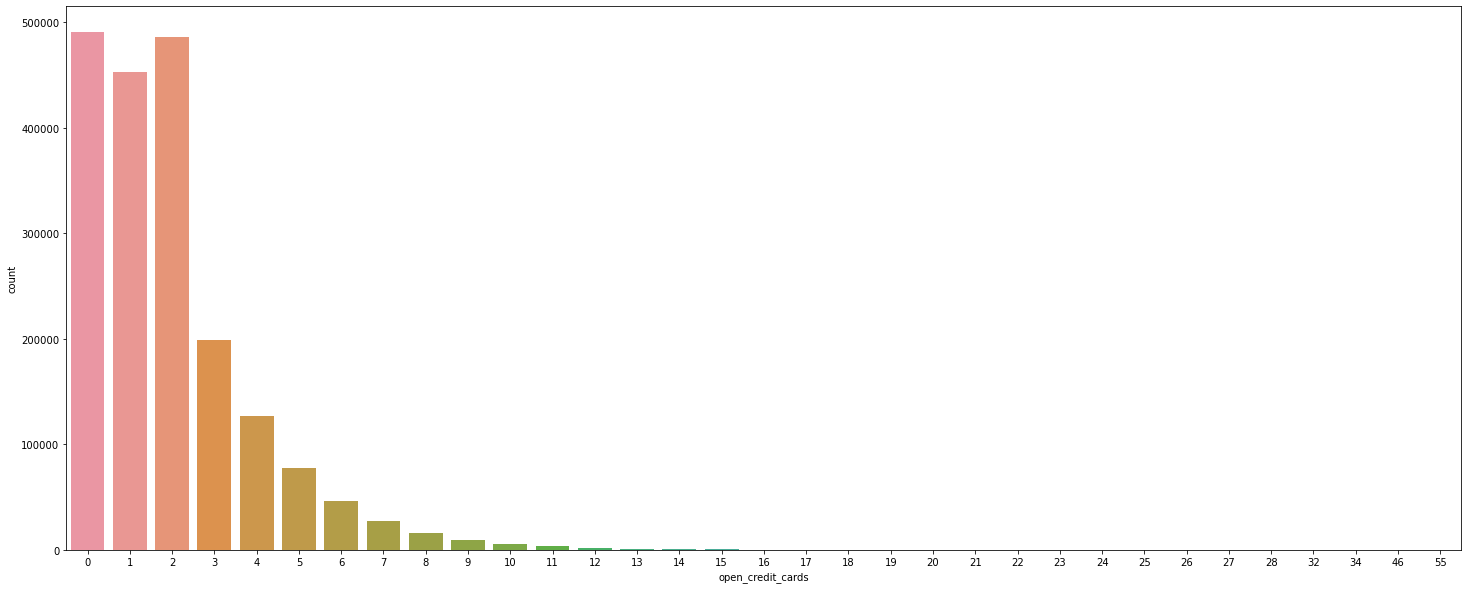

In [82]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.open_credit_cards)

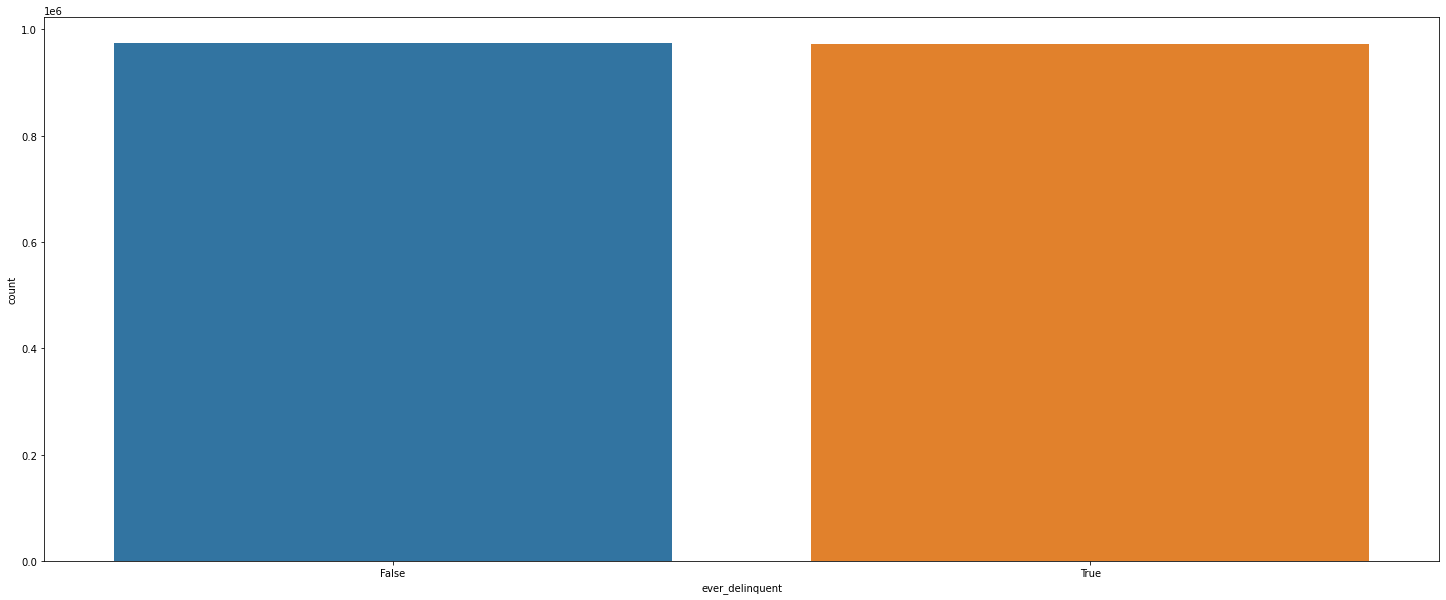

In [84]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.ever_delinquent)

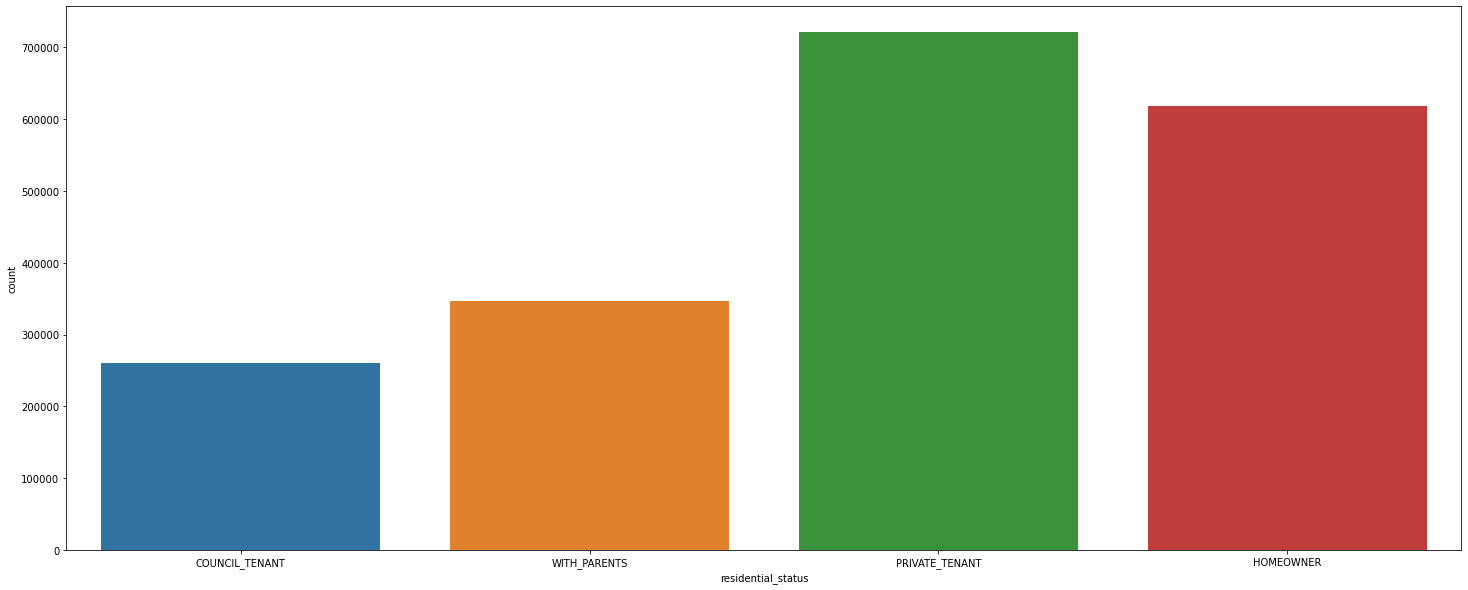

In [85]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.residential_status)

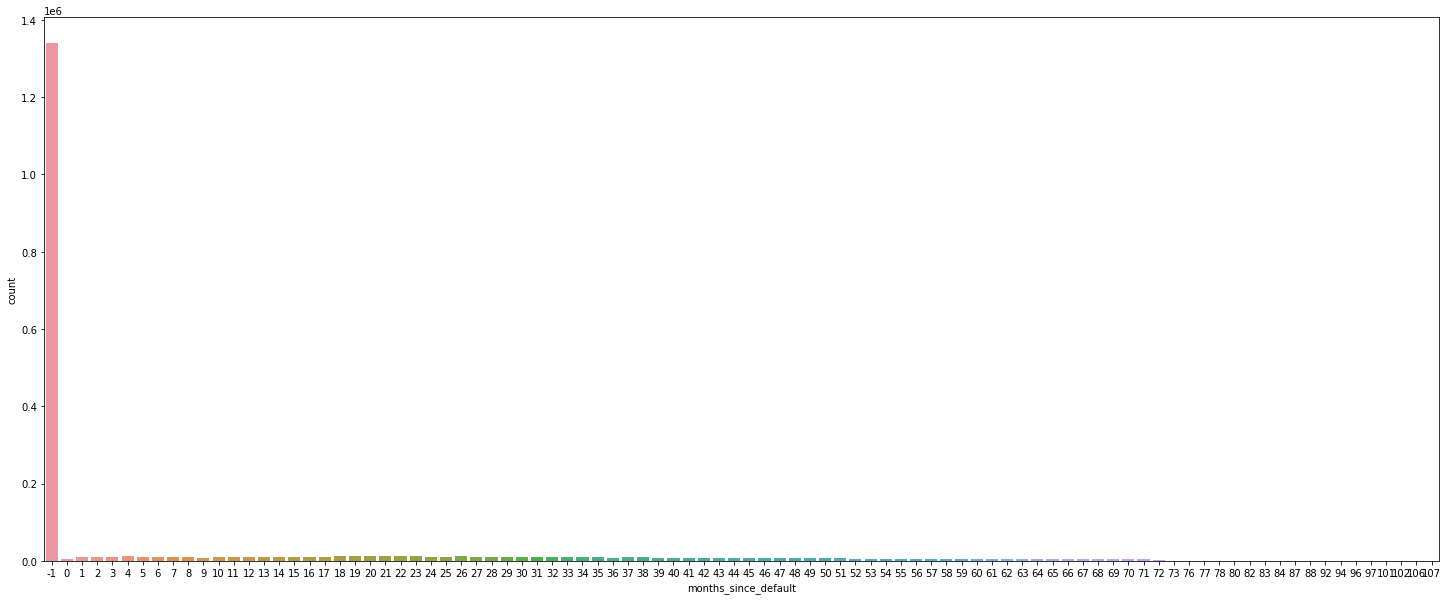

In [87]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.months_since_default)

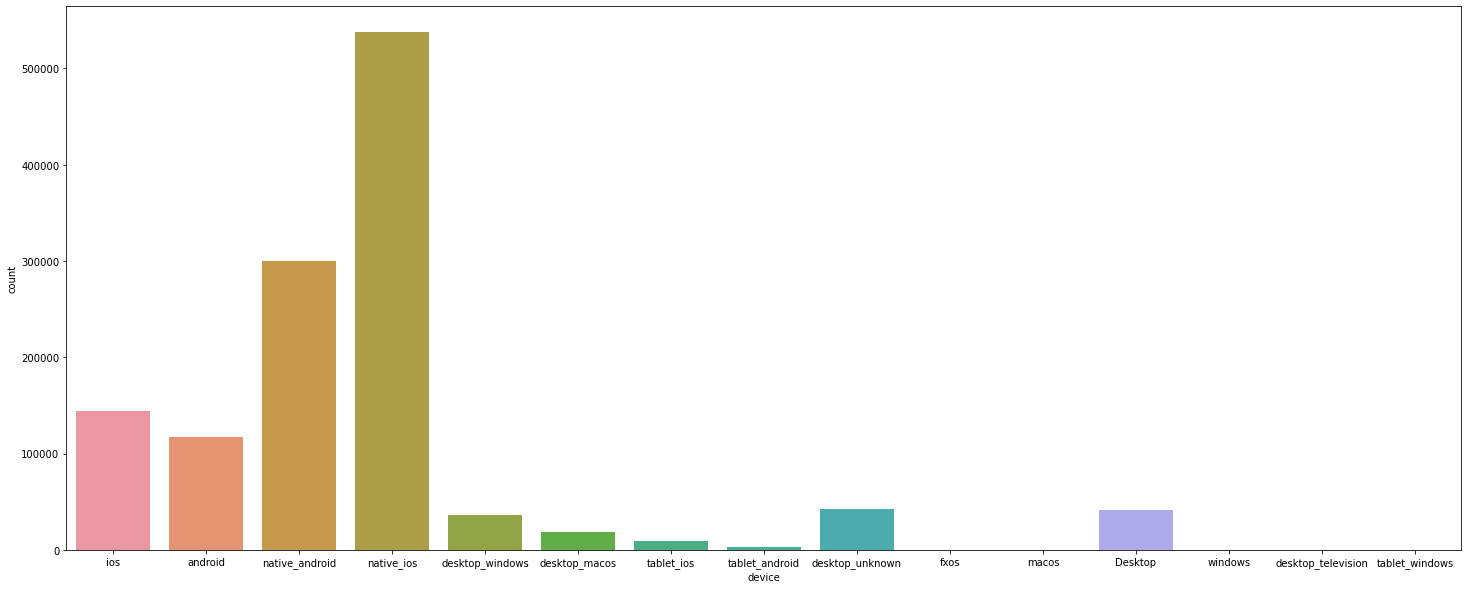

In [88]:
plt.figure(figsize=(25,10))
ax5 = sns.countplot(x=master.device)